lmplot

Функция sns.lmplot() (linear model plot) предназначена для построения линейных моделей (линейных регрессий) и их визуализации. Она сочетает в себе функциональность регрессионного анализа и возможности по созданию различных подграфиков.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.lmplot(data, *, x=None, y=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None)

sns.lmplot()

Основные параметры:

1) data: DataFrame, массив;
2) x, y: переменные для построения графика. X и Y задают координаты;
3) hue: позволяет добавлять цветовое различие для дополнительной переменной;
4) col: название переменной для создания столбцов подграфиков;
5) row: название переменной для создания рядов подграфиков;
6) col_wrap: определяет максимальное количество столбцов в одном ряду;
7) hue_order: порядок отображения категорий по параметру hue;
8) col_order: определяет порядок категорий для столбцов многопанельного графика;
9) row_order: определяет порядок категорий для рядов многопанельного графика;
10) height: высота каждого подграфика в дюймах (по умолчанию height=5);
11) aspect: соотношение сторон каждого подграфика (по умолчанию aspect=1);
12) markers: маркеры для различных значений переменной hue;
13) x_estimator: позволяет задать функцию для оценки центрального значения в каждой группе значений по оси X;
14) x_bins: разбивает ось X на равные интервалы (бины) и отображает средние значения для каждого из этих интервалов;
15) x_ci: задаёт доверительный интервал для центрального значения по оси X  (по умолчанию x_ci='ci');
16) scatter: определяет рисовать ли диаграмму рассеяния (по умолчанию scatter=True);
17) fit_reg: если True (по умолчанию), на графике отображается регрессионная линия;
18) ci: доверительный интервал для линии регрессии (по умолчанию ci=95). Если None, доверительный интервал не строится.
19) n_boot: количество выборок для вычисления доверительного интервала (по умолчанию n_boot=1000);
20) seed: задает начальное значение для генератора случайных чисел, что обеспечивает повторяемость результатов при многократном запуске кода;
21) logistic: если True, то рисуется линия логистической регрессии вместо линейной (по умолчанию logistic=False). Логистическая регрессия применяется, когда зависимая переменная является бинарной, то есть принимает только два значения, например, 0 и 1  или False и True;
22) lowess: если True, то рисуется линия lowess регрессии (локально взвешенная регрессия) вместо линейной (по умолчанию lowess=False);
23) robust: если True, то рисуется линия robust регрессии (устойчивая регрессия) вместо линейной (по умолчанию robust=False);
24) truncate: если True (по умолчанию), регрессионная линия обрезается до границ данных по оси X;
25) x_jitter: величина, на которую будут случайно смещены значения по оси X для визуализации распределения точек с одинаковыми X-значениями;
26) y_jitter: величина, на которую будут случайно смещены значения по оси Y для визуализации распределения точек с одинаковыми Y-значениями.

Возможные значения для scatter_kws:

1) color: цвет точек;
2) s: размер точек;
3) alpha: прозрачность точек;
4) edgecolor: цвет границы точек;
5) linewidth: толщина границы точек.

In [5]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


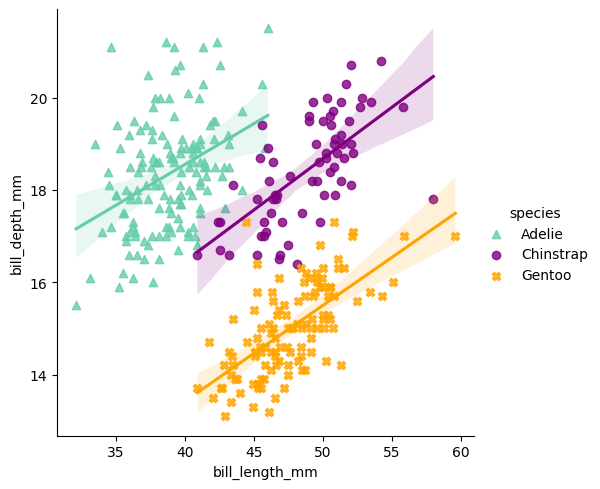

In [35]:
my_palette = ['MediumAquamarine', 'purple', 'orange']

sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette=my_palette,
           hue='species',
           ci=99,
           markers=['^', 'o', 'X'])
plt.show()

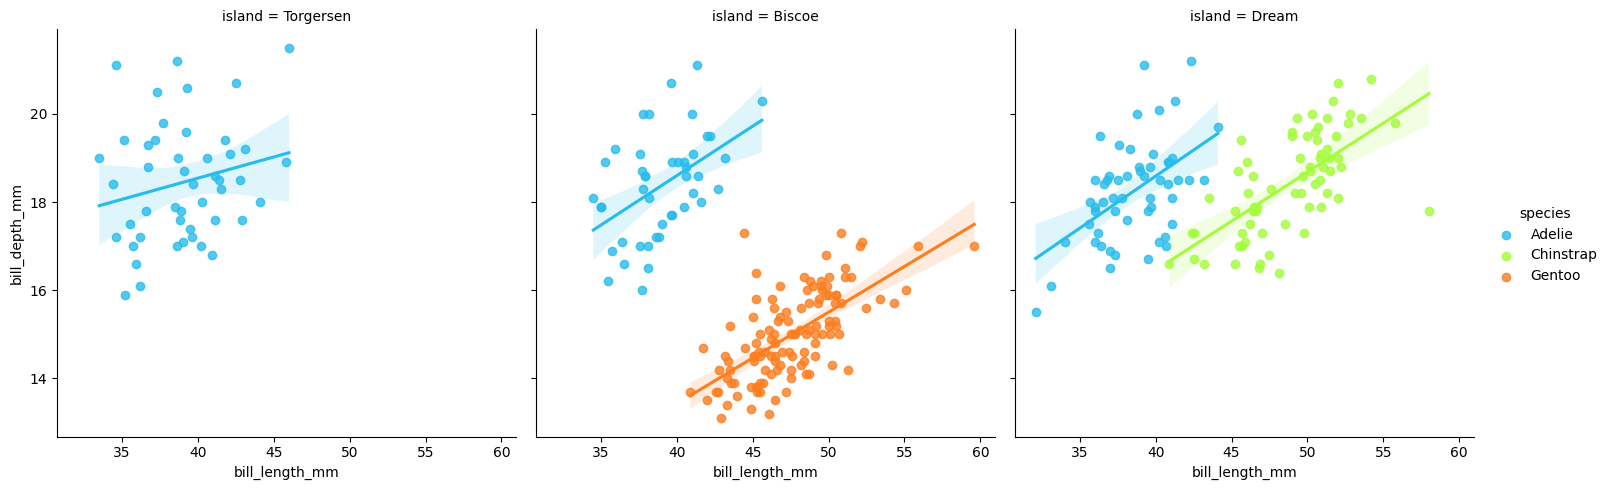

In [39]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='turbo',
           hue='species',
           col='island')
plt.show()

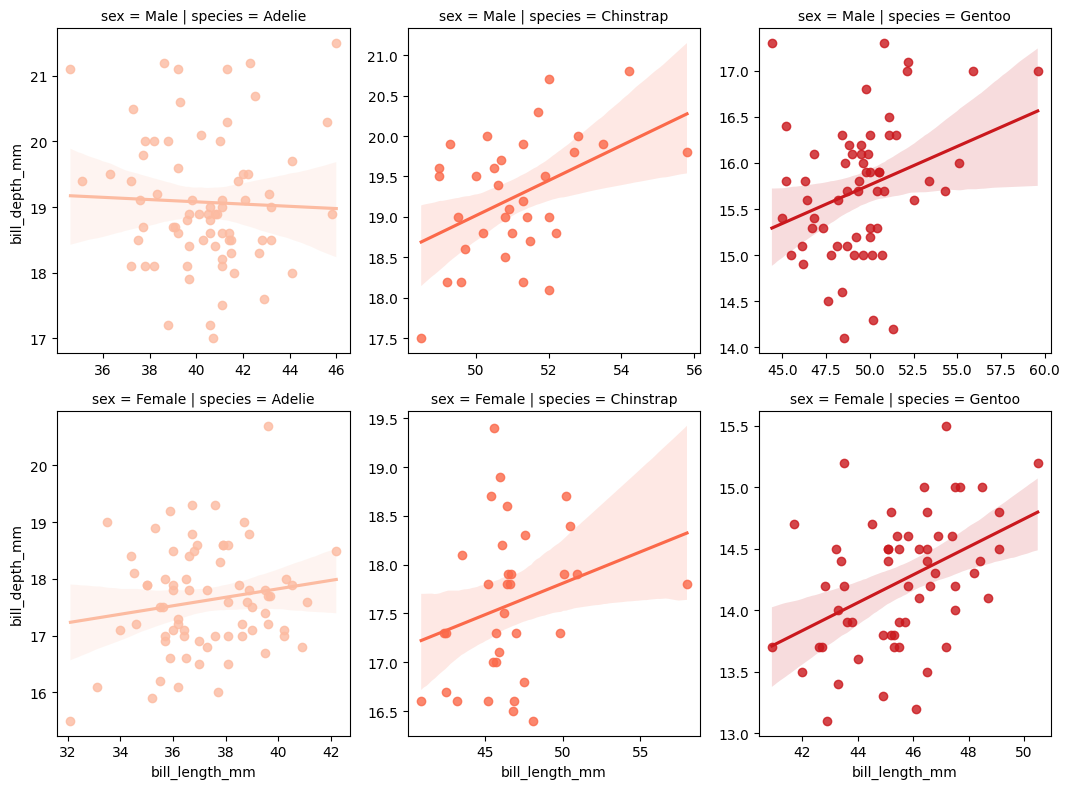

In [84]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='Reds',
           hue='species',
           col='species',
           row='sex',
           height=4,
           aspect=0.9,
           facet_kws={'sharey': False, 
                      'sharex': False, 
                      'despine': False})

plt.show()

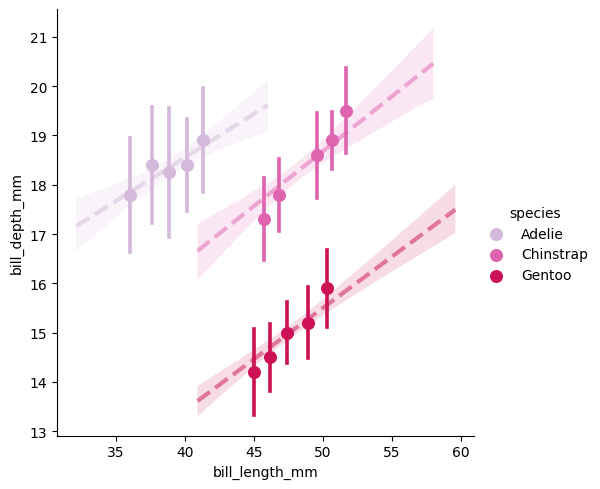

In [116]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='PuRd',
           hue='species',
           x_bins=5,
           x_ci='sd',
           x_estimator=np.median,
           scatter_kws={'s': 70},
           line_kws={'linewidth': 3, 
                     'linestyle': '--', 
                     'alpha': 0.5})

plt.show()

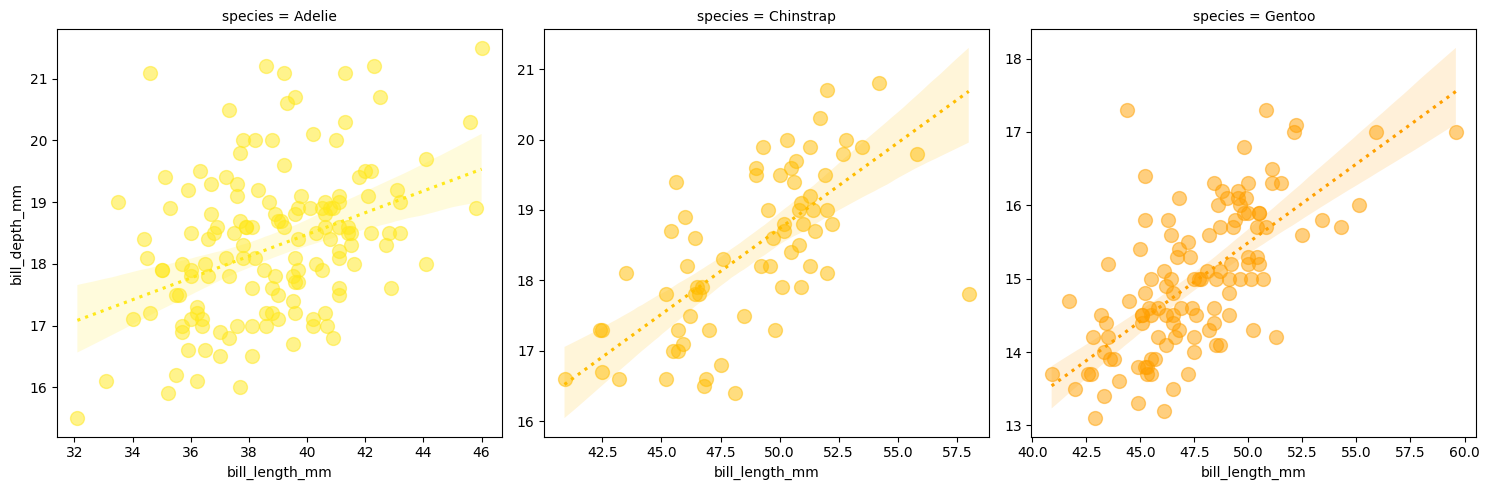

In [172]:
sns.lmplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
           palette='Wistia',
           hue='species',
           col='species',
           scatter_kws={'s': 100, 'alpha': 0.5},
           line_kws={'linestyle': ':'},
           facet_kws=dict(sharex=False, sharey=False, despine=False),
           robust=True)

plt.show()

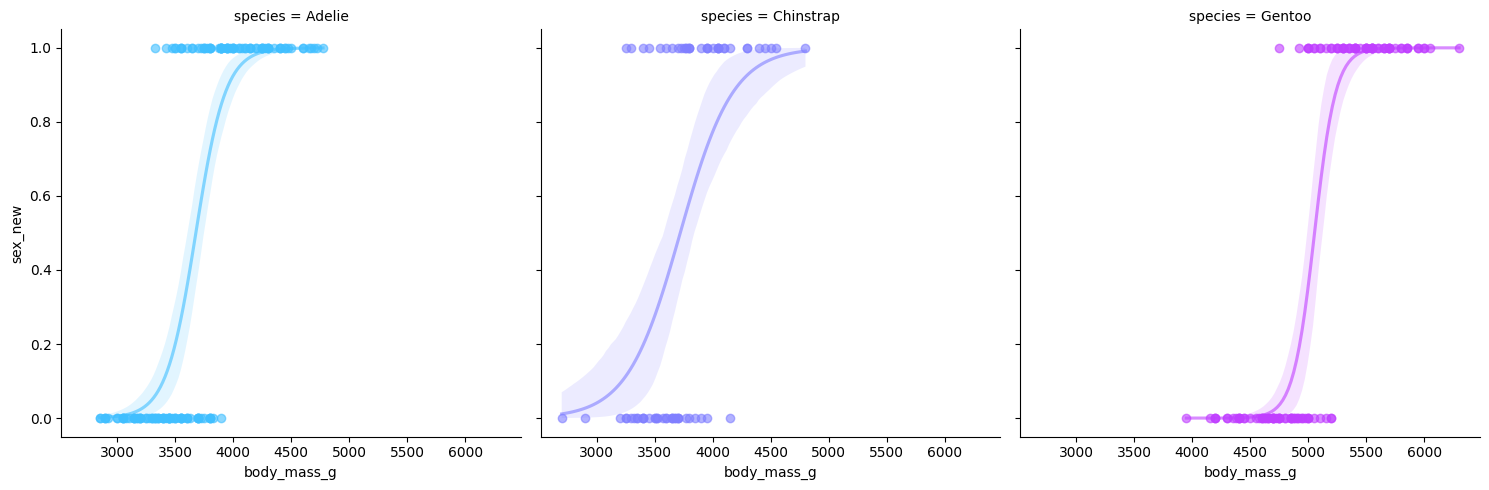

In [168]:
penguins['sex_new'] = [int(x=='Male') for x in penguins['sex']]

sns.lmplot(data=penguins, x='body_mass_g', y='sex_new',
           palette='cool',            
           hue='species',
           col='species',
           logistic=True,
           line_kws=dict(alpha=0.6),
           scatter_kws=dict(alpha=0.6))

plt.show()